In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

**Data Preprocessing**

In [ ]:
#Importing the data
msft = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MSFT.csv')
msft

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-07,339.320007,341.790009,337.000000,337.220001,334.602509,21185300
1,2023-07-10,334.600006,335.230011,327.589996,331.829987,329.254333,32791400
2,2023-07-11,331.059998,332.859985,327.000000,332.470001,329.889404,26698200
3,2023-07-12,336.600006,341.649994,335.670013,337.200012,334.582672,29995300
4,2023-07-13,339.559998,343.739990,339.019989,342.660004,340.000275,20567200
...,...,...,...,...,...,...,...
246,2024-06-28,453.070007,455.380005,446.410004,446.950012,446.950012,28362300
247,2024-07-01,448.660004,457.369995,445.660004,456.730011,456.730011,17662800
248,2024-07-02,453.200012,459.589996,453.109985,459.279999,459.279999,13979800
249,2024-07-03,458.190002,461.019989,457.880005,460.769989,460.769989,9932800


In [ ]:
feature_coumns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
X = msft[feature_coumns]
y = msft['Close']

**Data Visualization**



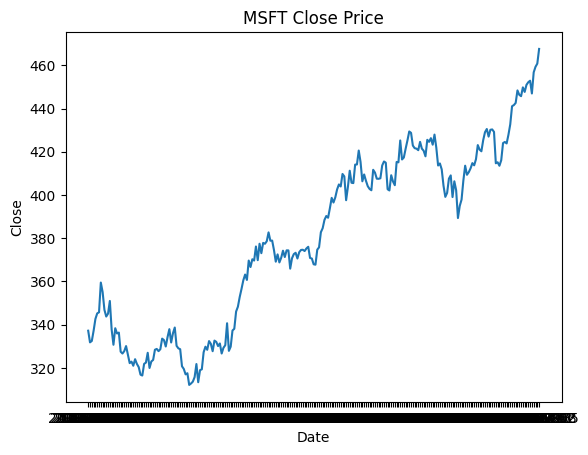

In [ ]:
#Data Visualization
plt.plot(msft['Date'], msft['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('MSFT Close Price')
plt.show()

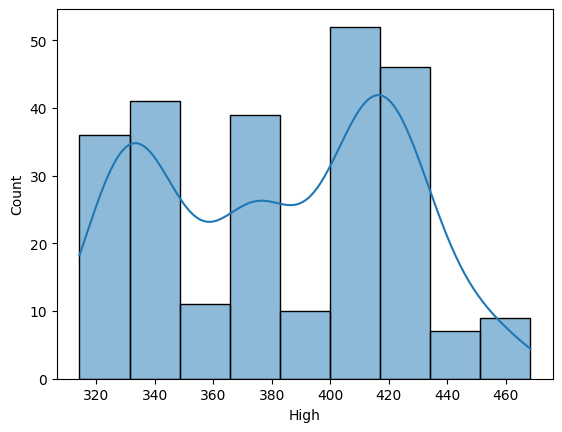

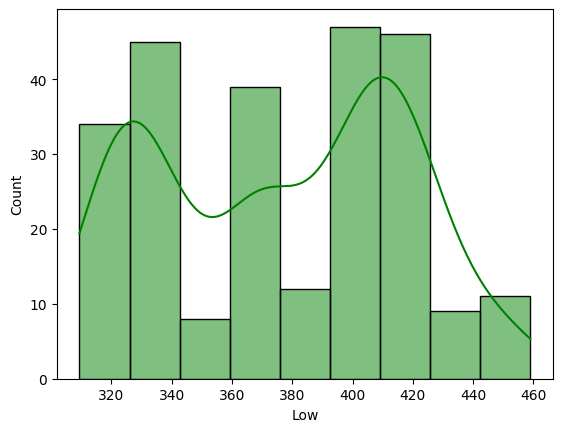

In [ ]:
sns.histplot(msft['High'], kde=True)
plt.show()
sns.histplot(msft['Low'], kde=True, color='Green')
plt.show()

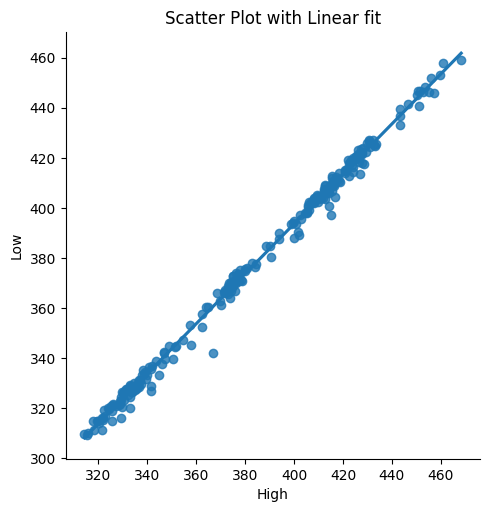

In [ ]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(data=msft, x='High', y='Low', fit_reg=True)
plt.xlabel('High')
plt.ylabel('Low')
plt.title("Scatter Plot with Linear fit");
plt.show()

In [ ]:
#Spliting the data, training the model and predicting
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
score = dtree.score(X_test, y_test)
y_pred = dtree.predict(X_test)

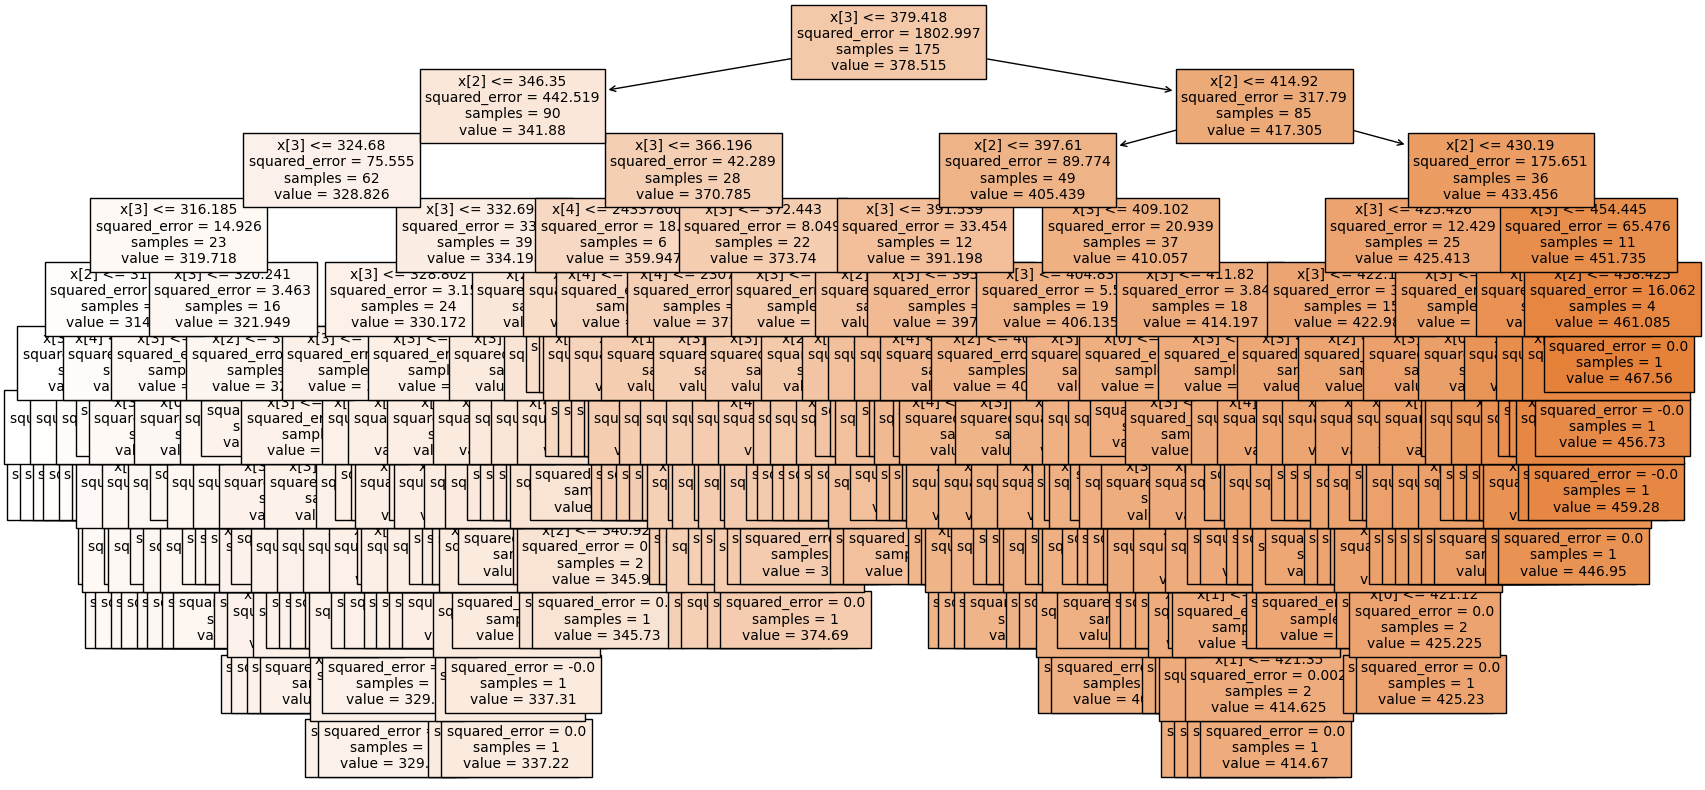

In [ ]:
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dtree, filled=True, fontsize=10)
plt.show()

In [ ]:
#Accuracy metrics for the Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
metrics=['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)']
values=[mse, rmse, mae, r2]
metrics_df=pd.DataFrame({'Regression Metrics': metrics, 'Value': values})
metrics_df

,Regression Metrics,Value
0,Mean Squared Error (MSE),4.480622
1,Mean Absolute Error (MAE),2.116748
2,Root Mean Squared Error (RMSE),1.164735
3,R-squared (R2),0.996896
